## Plot the distribution of BoxOffice collections in the combined dataset
What is your inference?

Are there any outliers? Who are they?


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.0 MB/s eta 0:00:004.5 MB/s eta 0:00:01


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

indian_movies = pd.read_csv('indian_movies_cleaned.csv')
bollywood = pd.read_csv('bollywood_movies_cleaned.csv')
tollywood = pd.read_csv('tollywood_movies_cleaned.csv')

combined = pd.concat([indian_movies, bollywood, tollywood], ignore_index=True)

combined.columns = combined.columns.str.strip()

combined['BoxOffice (Crores)'] = pd.to_numeric(combined['BoxOffice (Crores)'], errors='coerce')

combined = combined.drop_duplicates(subset='Title', keep='first')

combined.reset_index(drop=True, inplace=True)

combined.head()


,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005,89.0,178.0,7.5,173,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018,550.0,800.0,6.9,147,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018,50.0,250.0,7.9,156,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019,89.0,178.0,8.4,181,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,MOV026,Pailwaan,S. Krishna,Sports Action,2019,30.0,55.0,6.8,153,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


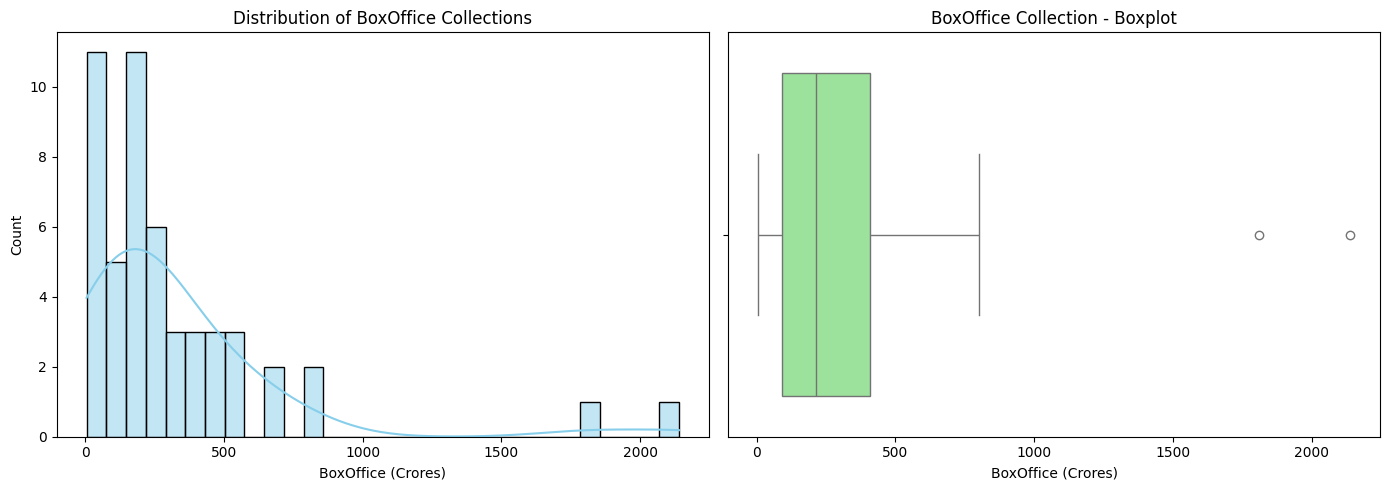

,Title,BoxOffice (Crores)
0,Dangal,2140.0
1,Baahubali 2: The Conclusion,1810.0


In [13]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(clean_boxoffice, kde=True, bins=30, color='skyblue')
plt.title('Distribution of BoxOffice Collections')
plt.xlabel('BoxOffice (Crores)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_boxoffice, color='lightgreen')
plt.title('BoxOffice Collection - Boxplot')

plt.tight_layout()
plt.savefig('Q2. Distribution of boxofficecollections and boxplot.png')
plt.show()

Q1 = clean_boxoffice.quantile(0.25)
Q3 = clean_boxoffice.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outlier_condition = combined['BoxOffice (Crores)'] > upper_bound
outliers = combined[outlier_condition][['Title', 'BoxOffice (Crores)']].sort_values(by='BoxOffice (Crores)', ascending=False).reset_index(drop=True)

outliers.head(10)


## Inference
-- The graph shows a right-skewed distribution it means most movies boxoffice/roi is under a certain range, while a few outliers make more.

-- The boxplot shows this with several points beyond the upper whisker.

-- These outliers represent blockbuster hits like big-budget movies.

-- The top 2 movies identified are the very high-earning outliers in the dataset.


## Outliers
Yes there are outliers in the data, which are Dangal with BoxOfficeCollections of 2140 crores and Baahubali 2: The Conclusion with BoxOfficeCollections of 1810 crores.
